In [1]:
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from pycm import ConfusionMatrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from autosklearn.classification import AutoSklearnClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

import numpy as np

/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (2.1.0) or chardet (None)/charset_normalizer (3.3.2) doesn't match a supported version!
  warnings.warn(


In [2]:
import os
import pandas as pd
from scipy.io import arff


# Path to the directory containing your CSV files
directory_path = '/home/danish/Datasets/ICS/multiclass'

# Get a list of all CSV files in the directory
csv_files = [file for file in os.listdir(directory_path) if file.endswith('.arff')]

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through each CSV file and concatenate its data to the combined DataFrame
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)
    df , _ = arff.loadarff(file_path)
    df = pd.DataFrame(df)
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Display the combined DataFrame
data = combined_df
data
# Optionally, you can save the combined DataFrame to a new CSV file
# combined_df.to_csv('/path/to/combined_data.csv', index=False)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,64.480670,130431.1505,-55.513881,130381.0040,-175.514161,130481.2971,64.411915,481.39619,-60.596016,509.22891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
1,71.000930,131383.9348,-48.987891,131333.7883,-168.982443,131459.1546,77.933719,264.04462,-48.013863,282.90495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
2,74.879854,132361.7923,-45.108967,132311.6458,-165.114977,132411.9389,78.426463,274.48189,-44.329745,281.62318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
3,74.702237,132261.4993,-45.269395,132211.3527,-165.281135,132311.6458,77.435246,277.41165,-44.581846,281.98940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
4,74.633482,132236.4260,-45.361069,132186.2794,-165.361349,132311.6458,77.034176,278.51031,-44.696438,282.17251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,-119.696613,131308.7150,120.326867,131258.5685,0.309397,131358.8615,-116.235948,337.65484,122.045740,344.24680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
78373,-119.742450,131333.7883,120.286760,131308.7150,0.269290,131383.9348,-116.510968,338.02106,121.885312,344.79613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
78374,-119.765368,131383.9348,120.258112,131333.7883,0.246372,131434.0813,-116.740151,339.66905,121.696236,345.52857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
78375,-119.828393,131484.2279,120.200816,131434.0813,0.183346,131509.3012,-117.536562,342.41570,121.054523,347.35967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'


In [3]:
# List of bad or constant columns 
columns_to_drop = ['R3-PA:Z', 'R1-PA:Z', 'R2-PA:Z', 'R4-PA:Z', 'snort_log1', 'snort_log2', 'control_panel_log2', 'control_panel_log1']

# Remove specified columns
data = data.drop(columns=columns_to_drop)

In [4]:


# # Load your CSV file into a DataFrame
# csv_file = 'path_to_your_csv_file.csv'
# df = pd.read_csv(csv_file)

# # Assuming 'target' is your target column name
# target_column = 'target'

# # Split the data into features (X) and target (y)
# X = df.drop(columns=[target_column])
# y = df[target_column]

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize TPOT Classifier
# tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)

# # Search for the best pipeline
# tpot.fit(X_train, y_train)

# # Evaluate the best pipeline on the test set
# accuracy = tpot.score(X_test, y_test)
# print(f"Test accuracy: {accuracy}")

# # Make predictions
# y_pred = tpot.predict(X_test)

# # Calculate confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot confusion matrix
# plt.figure(figsize=(8, 6))
# plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
# plt.title('Confusion Matrix')
# plt.colorbar()
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# # Calculate ROC curve and AUC
# fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC)')
# plt.legend(loc="lower right")
# plt.show()

# # Calculate and print PyCM metrics
# pycm_obj = ConfusionMatrix(actual_vector=list(y_test), predict_vector=list(y_pred))
# print(pycm_obj)

# # Get detailed PyCM report
# pycm_report = pycm_obj.overall_stat
# print(pycm_report)


In [5]:

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
# data = pd.read_csv('/home/danish/Downloads/Datasets/ICS/binaryAllNaturalPlusNormalVsAttacks/data1.csv')
data.replace([np.inf, -np.inf], 1e15, inplace=True)
# data

# Extract the numerical columns for normalization
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols]
data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,R4:S,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log3,snort_log4,marker
0,64.480670,130431.1505,-55.513881,130381.0040,-175.514161,130481.2971,64.411915,481.39619,-60.596016,509.22891,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
1,71.000930,131383.9348,-48.987891,131333.7883,-168.982443,131459.1546,77.933719,264.04462,-48.013863,282.90495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
2,74.879854,132361.7923,-45.108967,132311.6458,-165.114977,132411.9389,78.426463,274.48189,-44.329745,281.62318,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
3,74.702237,132261.4993,-45.269395,132211.3527,-165.281135,132311.6458,77.435246,277.41165,-44.581846,281.98940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
4,74.633482,132236.4260,-45.361069,132186.2794,-165.361349,132311.6458,77.034176,278.51031,-44.696438,282.17251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'41'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,-119.696613,131308.7150,120.326867,131258.5685,0.309397,131358.8615,-116.235948,337.65484,122.045740,344.24680,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
78373,-119.742450,131333.7883,120.286760,131308.7150,0.269290,131383.9348,-116.510968,338.02106,121.885312,344.79613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
78374,-119.765368,131383.9348,120.258112,131333.7883,0.246372,131434.0813,-116.740151,339.66905,121.696236,345.52857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
78375,-119.828393,131484.2279,120.200816,131434.0813,0.183346,131509.3012,-117.536562,342.41570,121.054523,347.35967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'


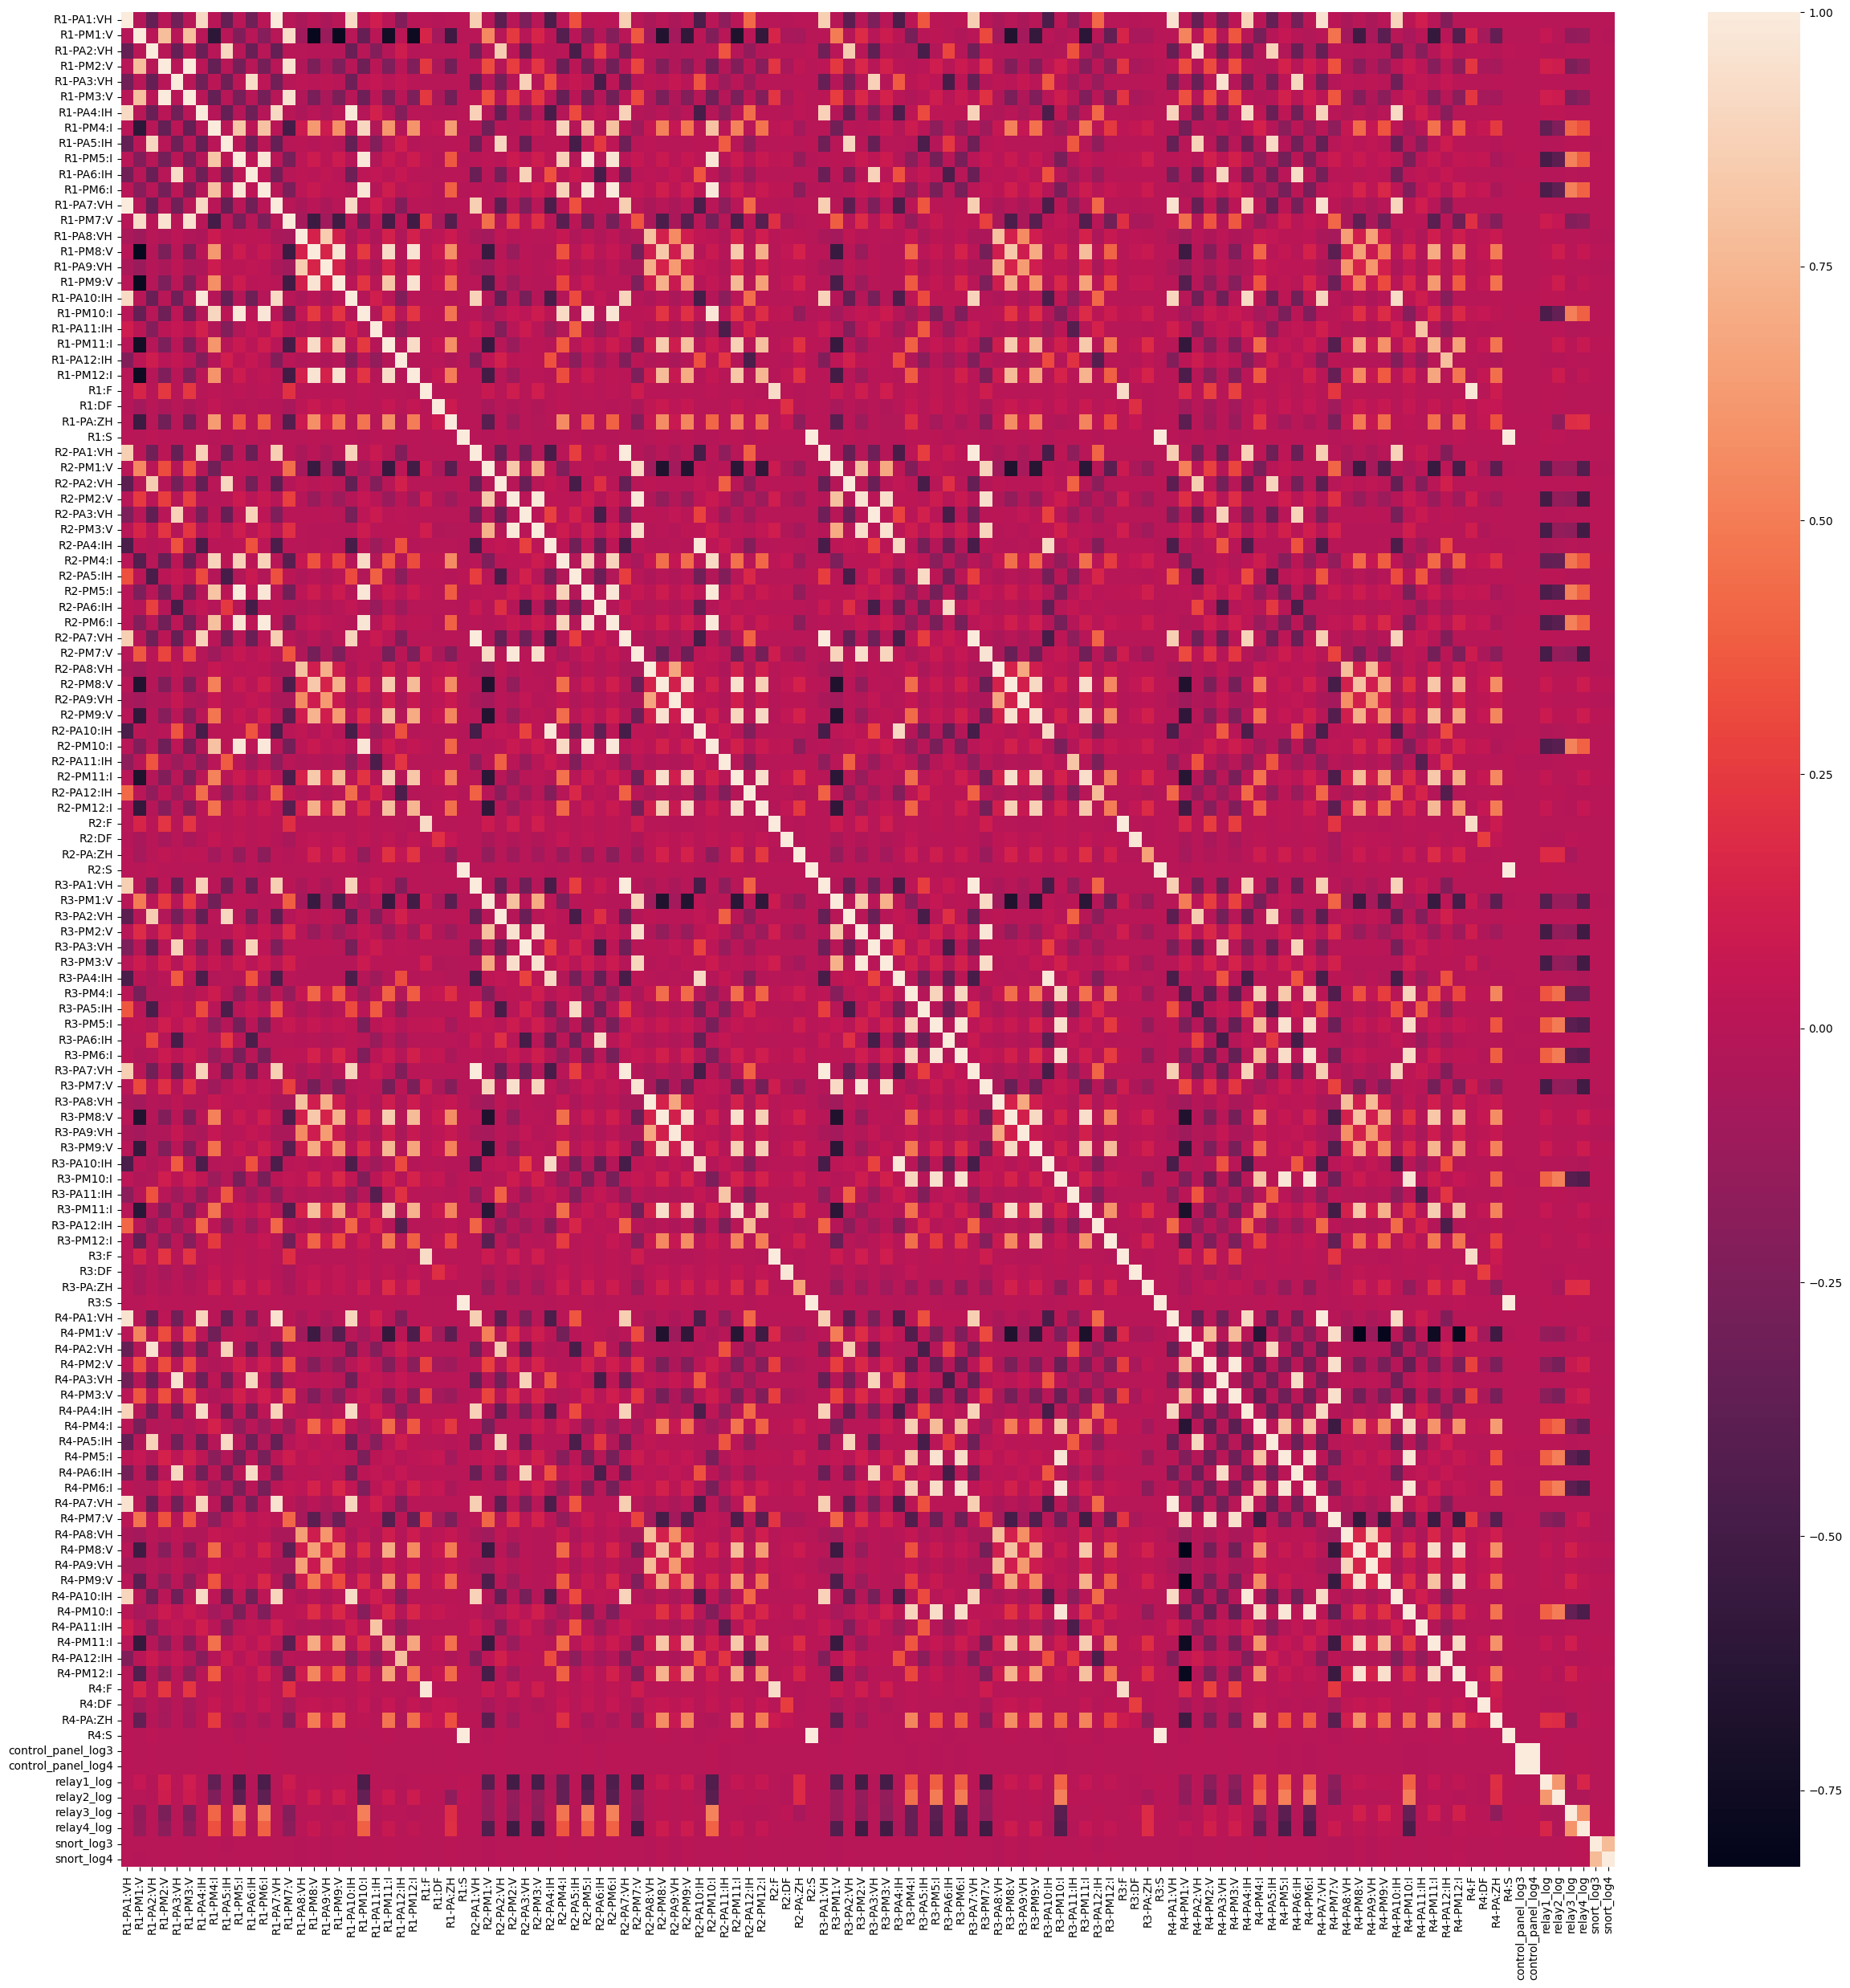

In [6]:

corr = pd.DataFrame(data.drop('marker', axis=1)).corr()

plt.figure(figsize=(30,30))

sns.heatmap(corr)

plt.show()

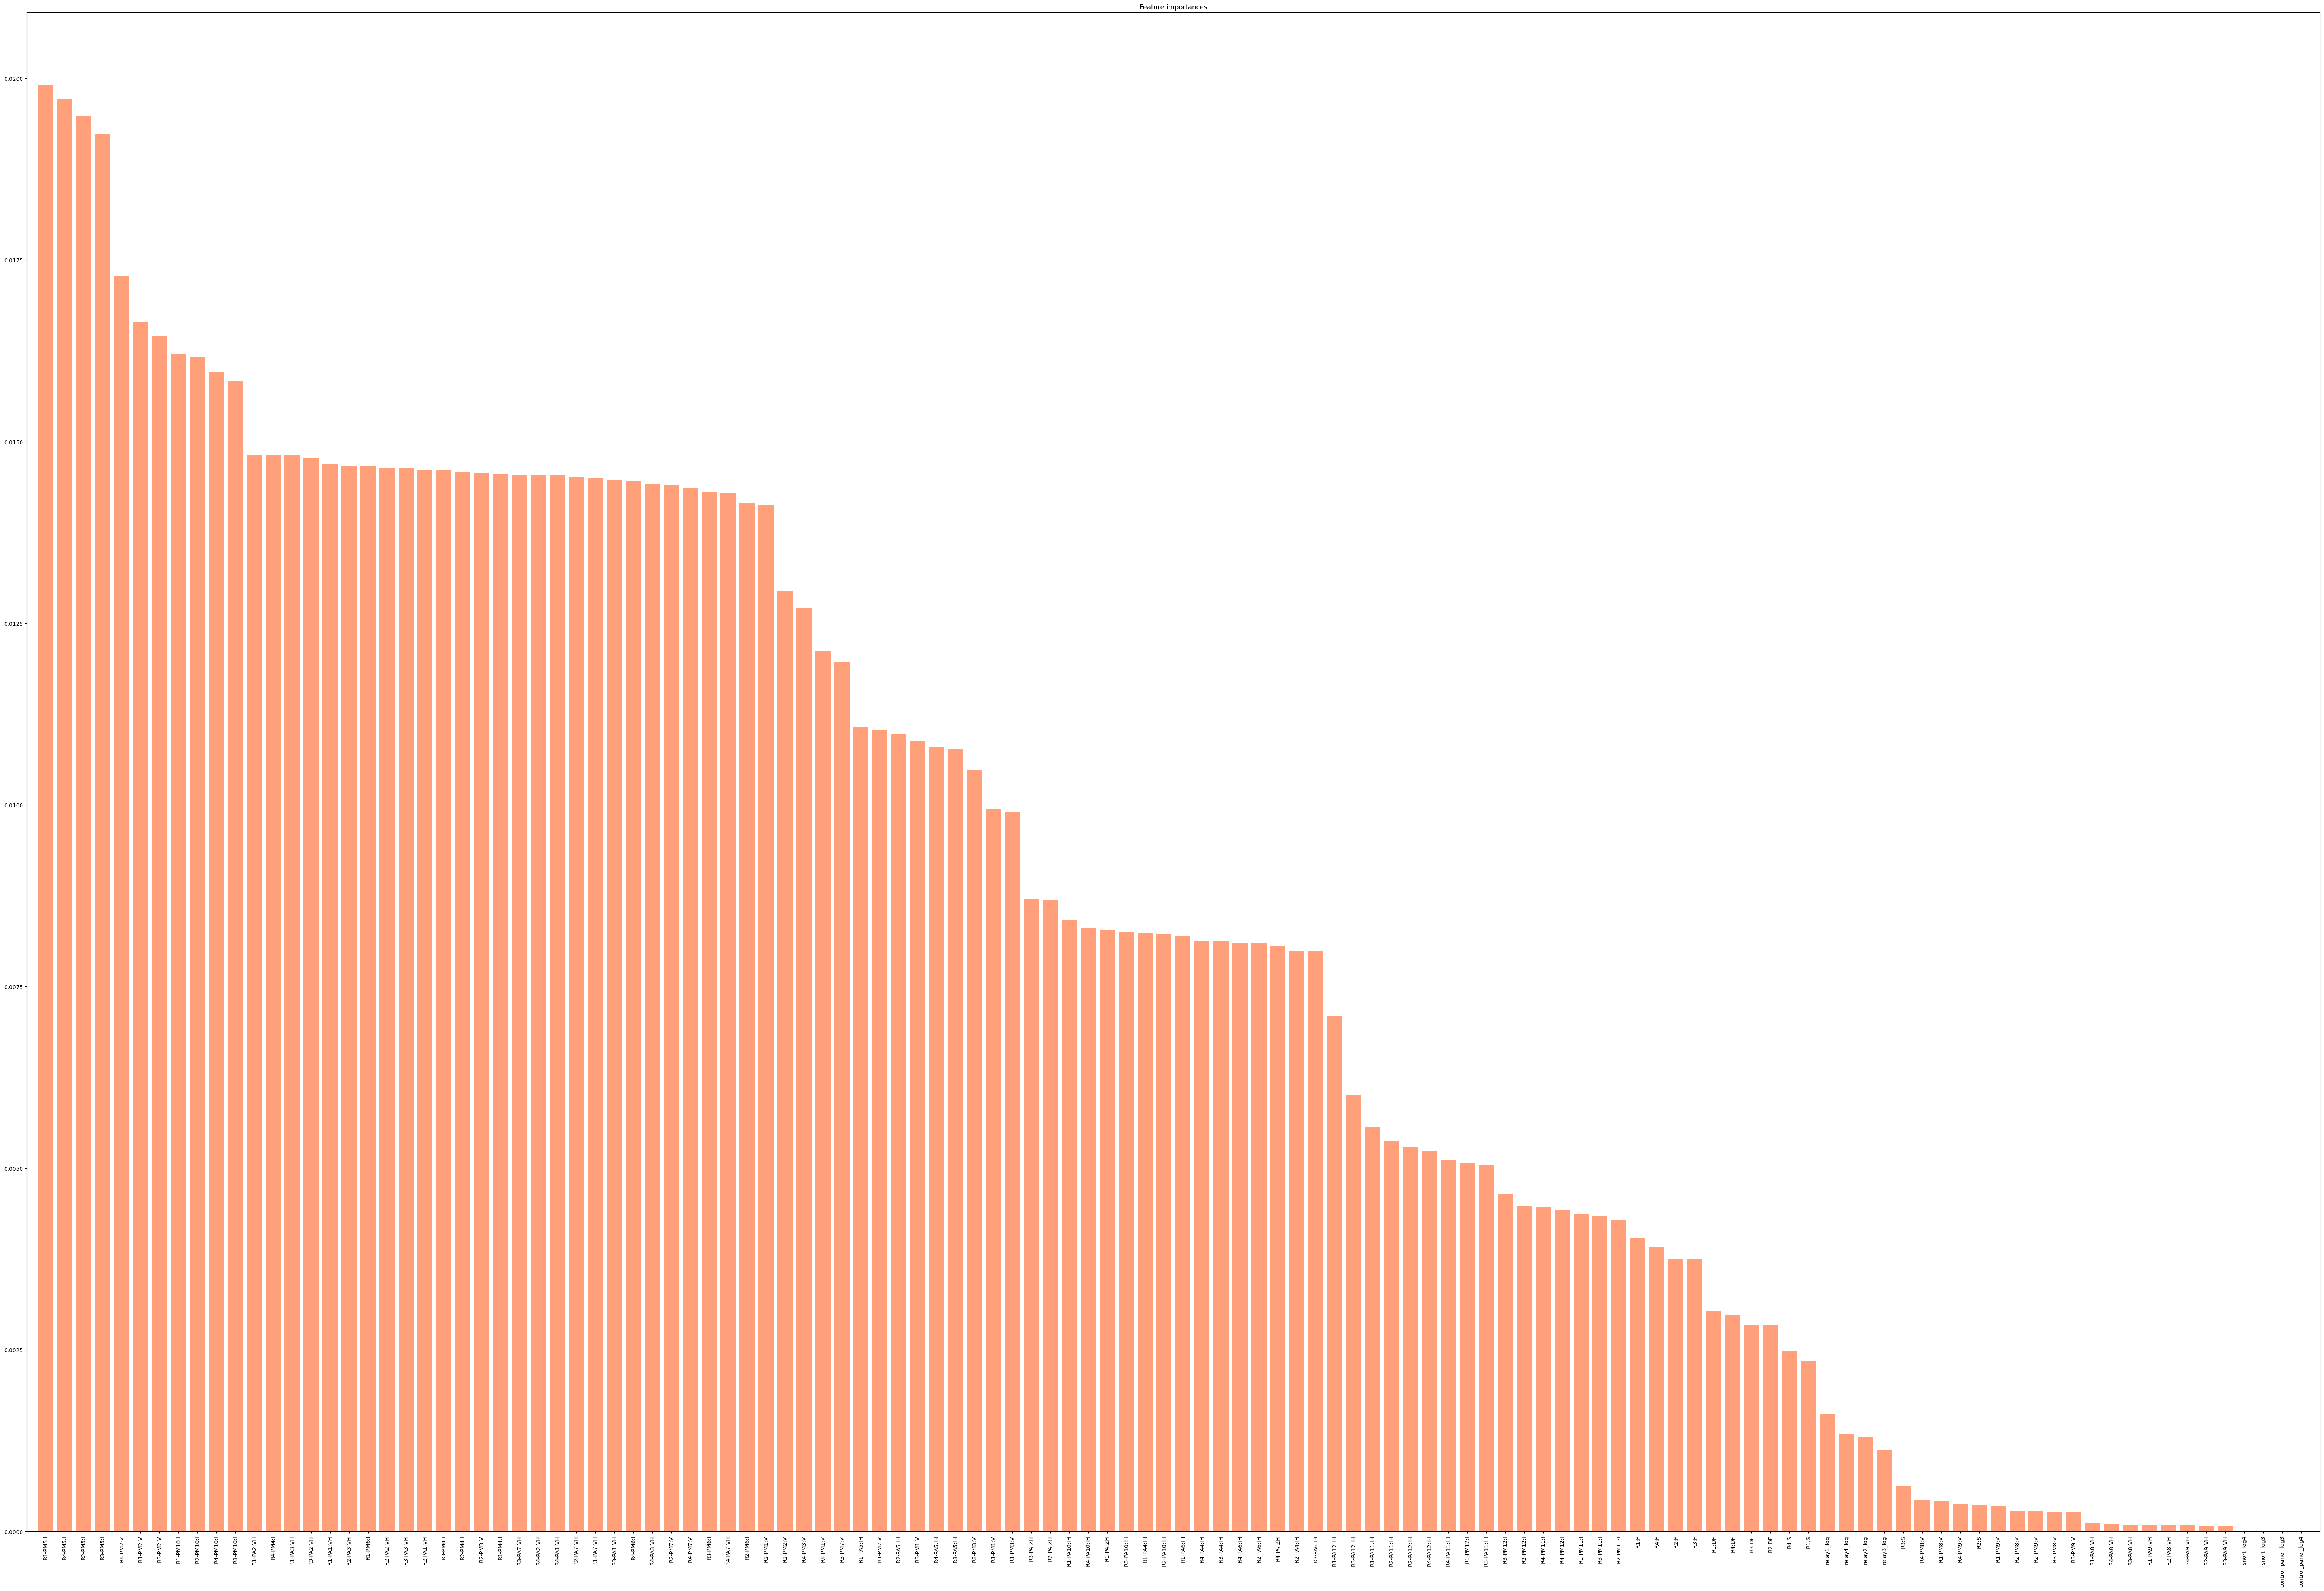

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
et.fit(data.drop('marker', axis=1), data['marker'].tolist())
importances = et.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(75,50))
plt.title("Feature importances")
plt.bar(range(data.drop('marker', axis=1).shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(data.drop('marker', axis=1).shape[1]), data.drop('marker', axis=1).columns[indices], rotation=90)
plt.xlim([-1, data.drop('marker', axis=1).shape[1]])
plt.show()

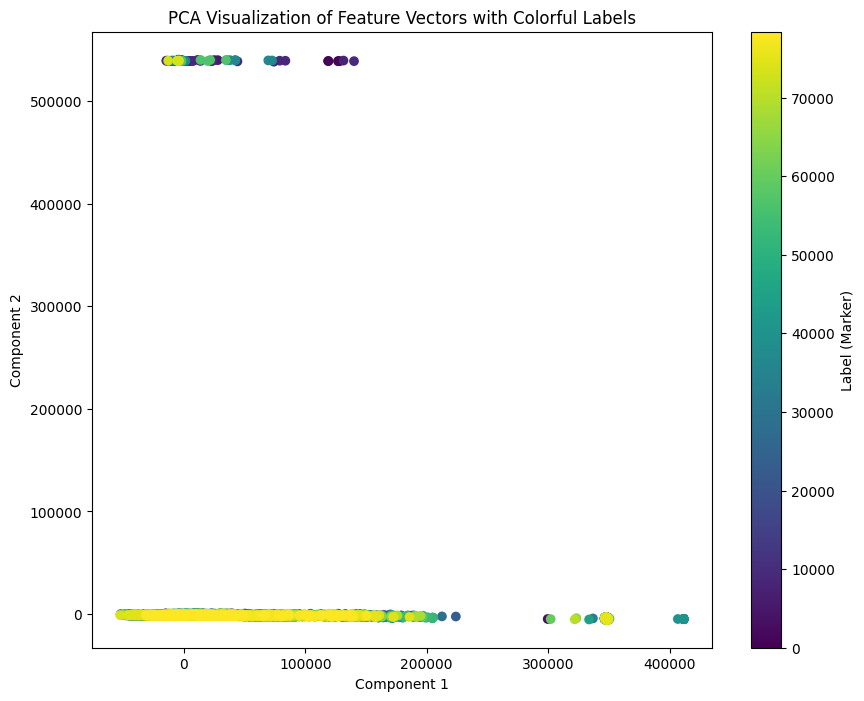

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' contains your DataFrame with features and labels
features1 = data.drop('marker', axis=1)  # Features
labels = data['marker']  # Labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
reduced_df = pd.DataFrame(components, columns=['Component 1', 'Component 2'])

# Plot PCA visualization with colored points based on labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], c=range(0,78377), cmap='viridis')
plt.title('PCA Visualization of Feature Vectors with Colorful Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label (Marker)')
plt.show()


Explained Variance Ratio: [0.50922156 0.30467767 0.10109657]


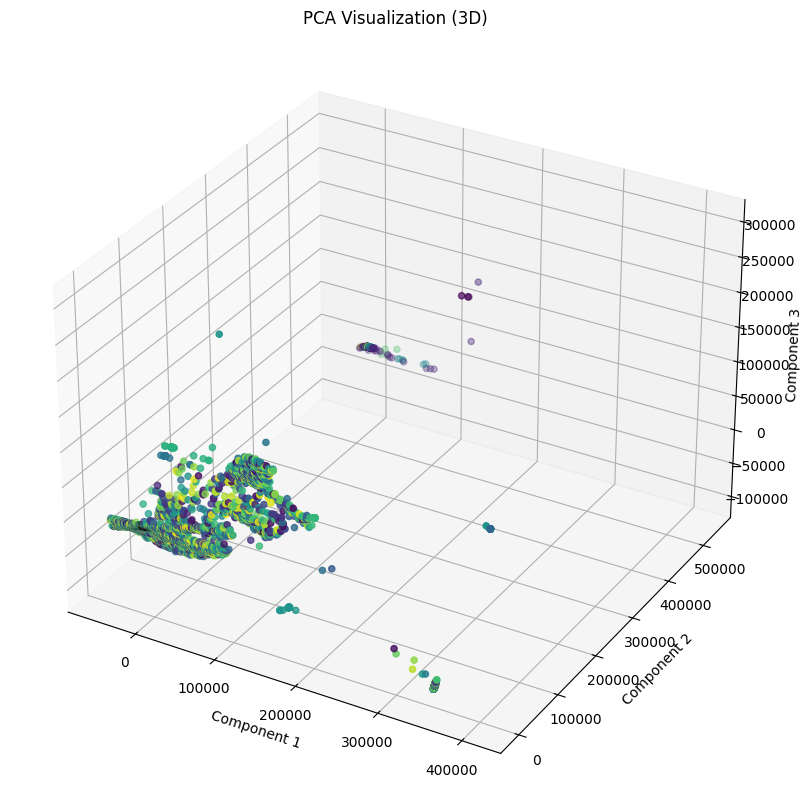

In [9]:
# Assuming 'df' contains your data
features1 = data.drop('marker', axis=1)  # Features
label = data['marker']  # Labels

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Plotting 3D PCA visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=range(0,78377), cmap='viridis')
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


In [10]:
et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)

# sfm = SelectFromModel(rf, threshold=0.00025)
sfm = SelectFromModel(et)
sfm.fit(data.drop('marker', axis=1), data['marker'].tolist())
# X_important_train = sfm.transform(X_train)
# X_important_test = sfm.transform(X_test)

feature_vector_1 = sfm.transform(data.drop('marker', axis=1))

# rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
# rf.fit(X_important_train, y_train)
# y_pred = rf.predict(X_important_test)
# print(classification_report(y_test, y_pred))
print(feature_vector_1.shape)




(78377, 55)


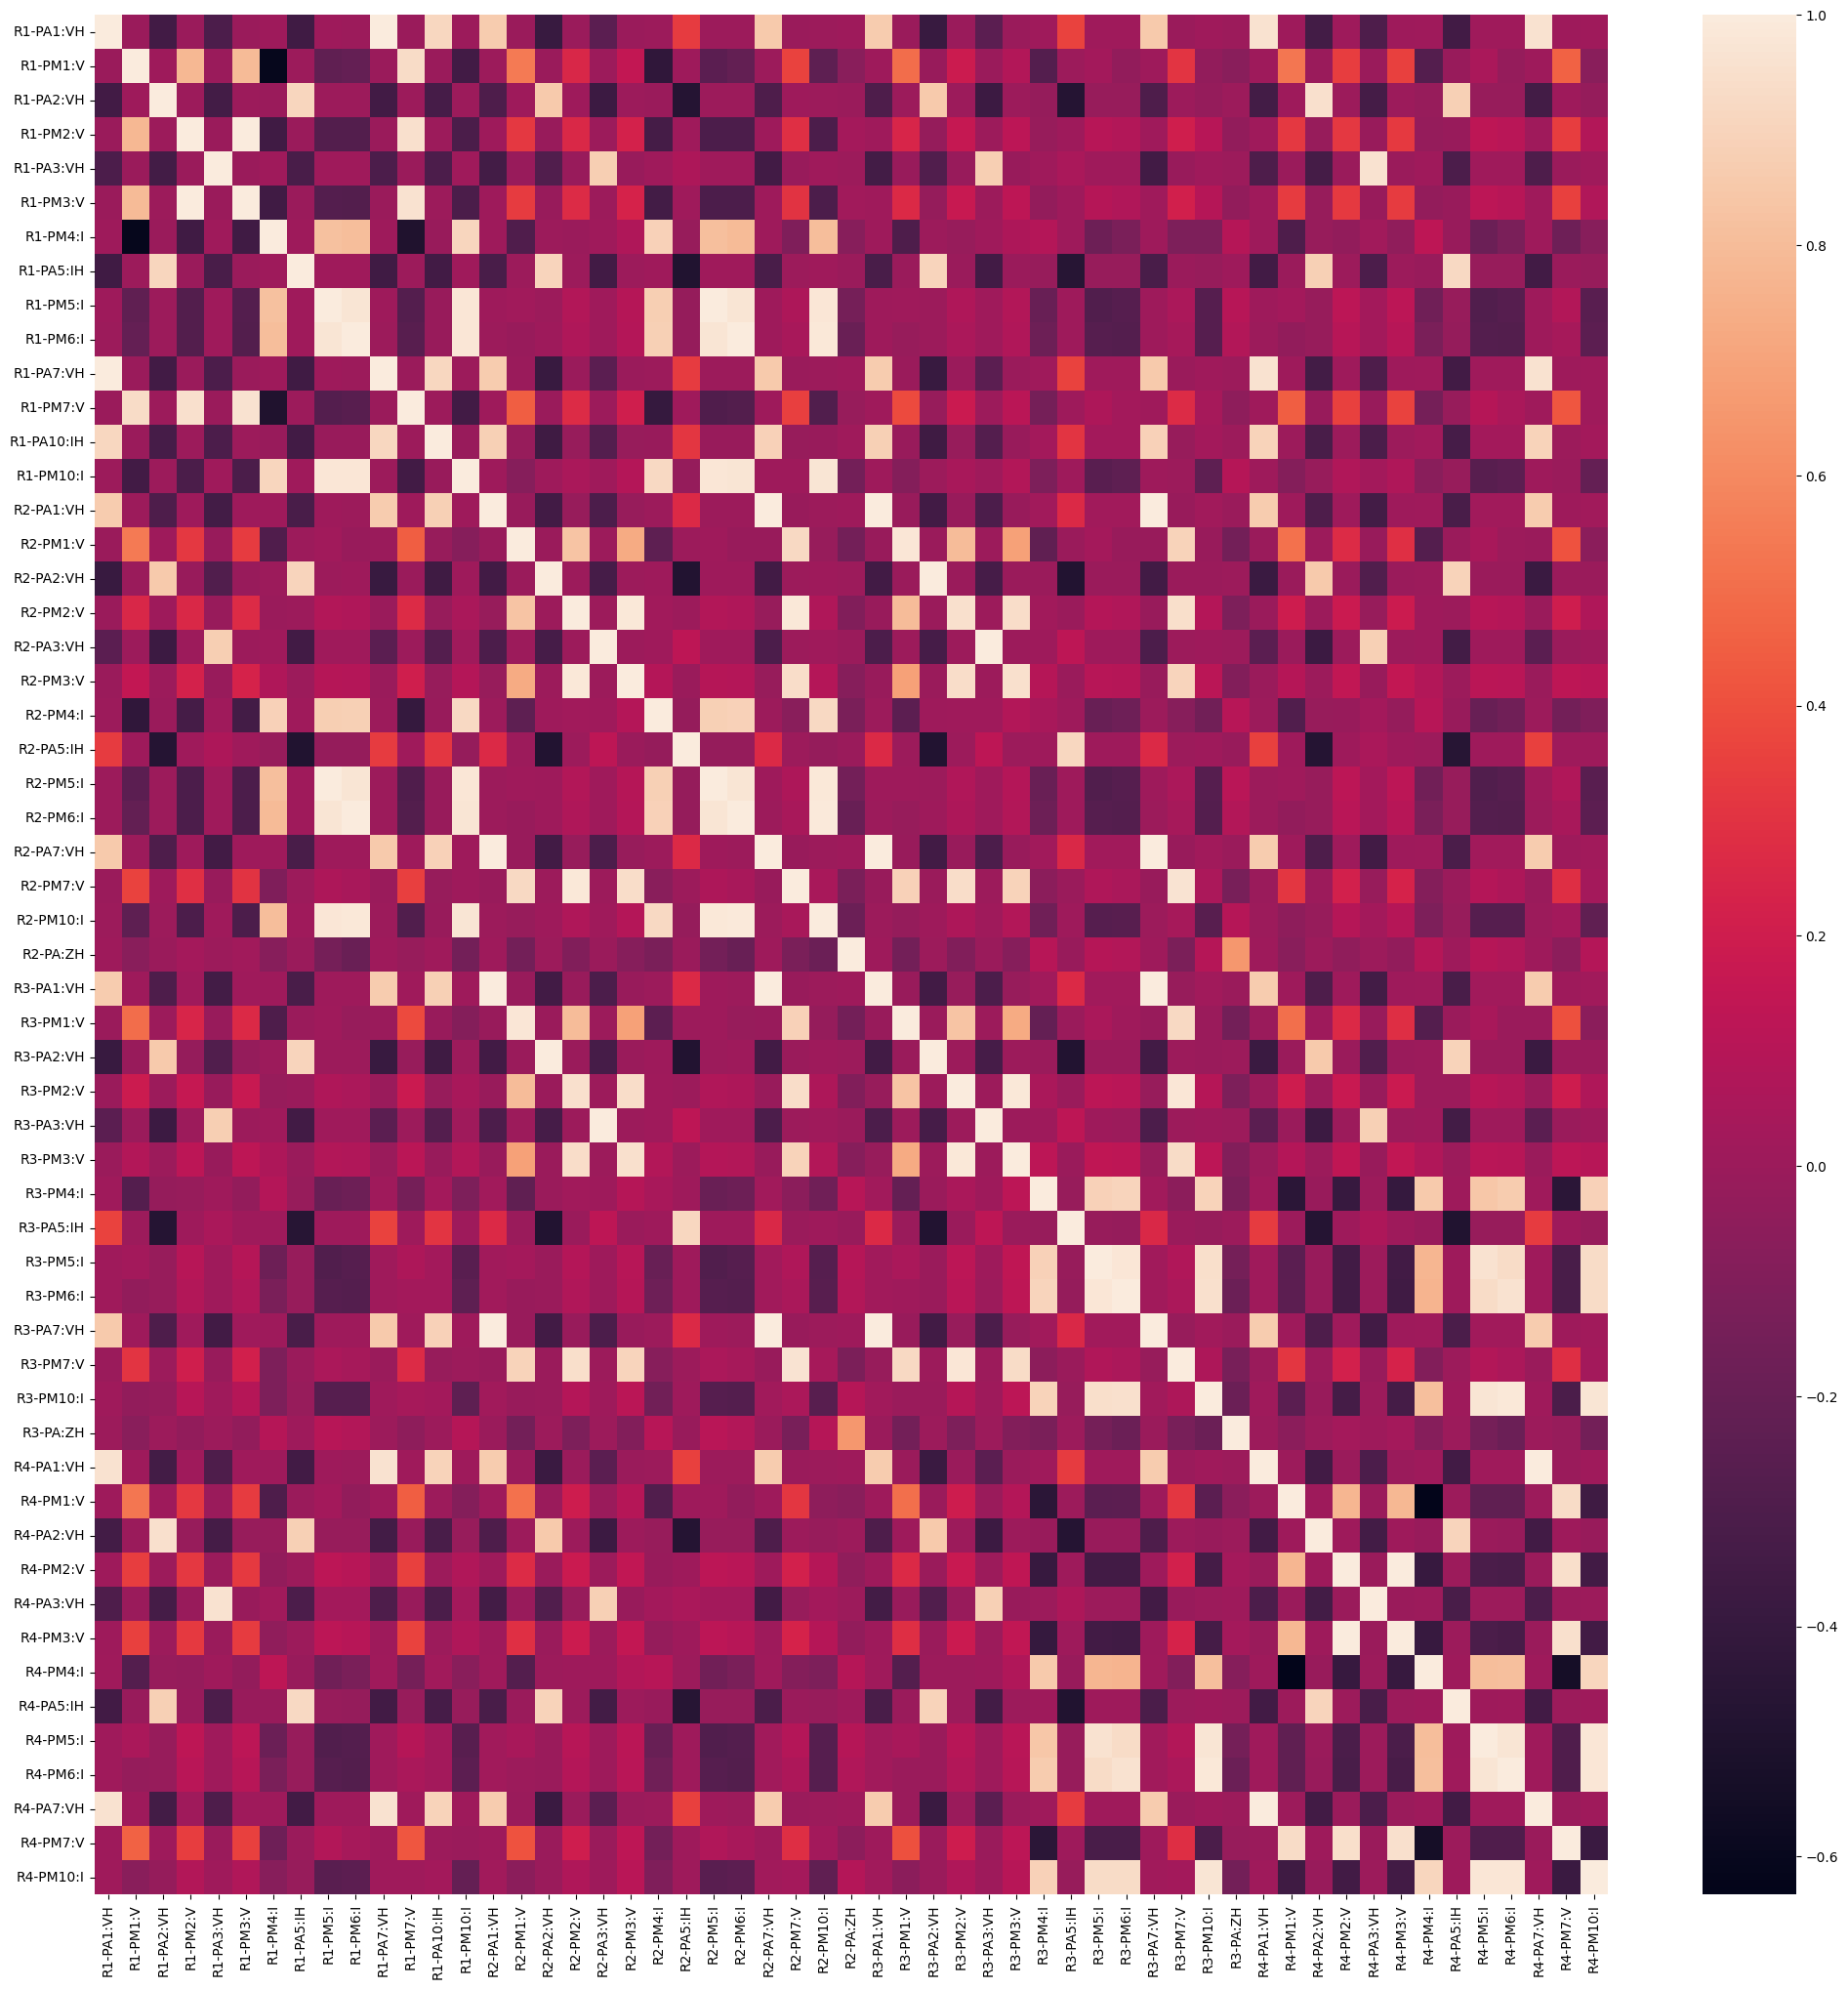

In [11]:
cols = sfm.get_feature_names_out()
feature_vector_1 =pd.DataFrame(feature_vector_1)
feature_vector_1.columns = cols
feature_vector_1



corr = pd.DataFrame(feature_vector_1).corr()

plt.figure(figsize=(25,25))

sns.heatmap(corr)

plt.show()

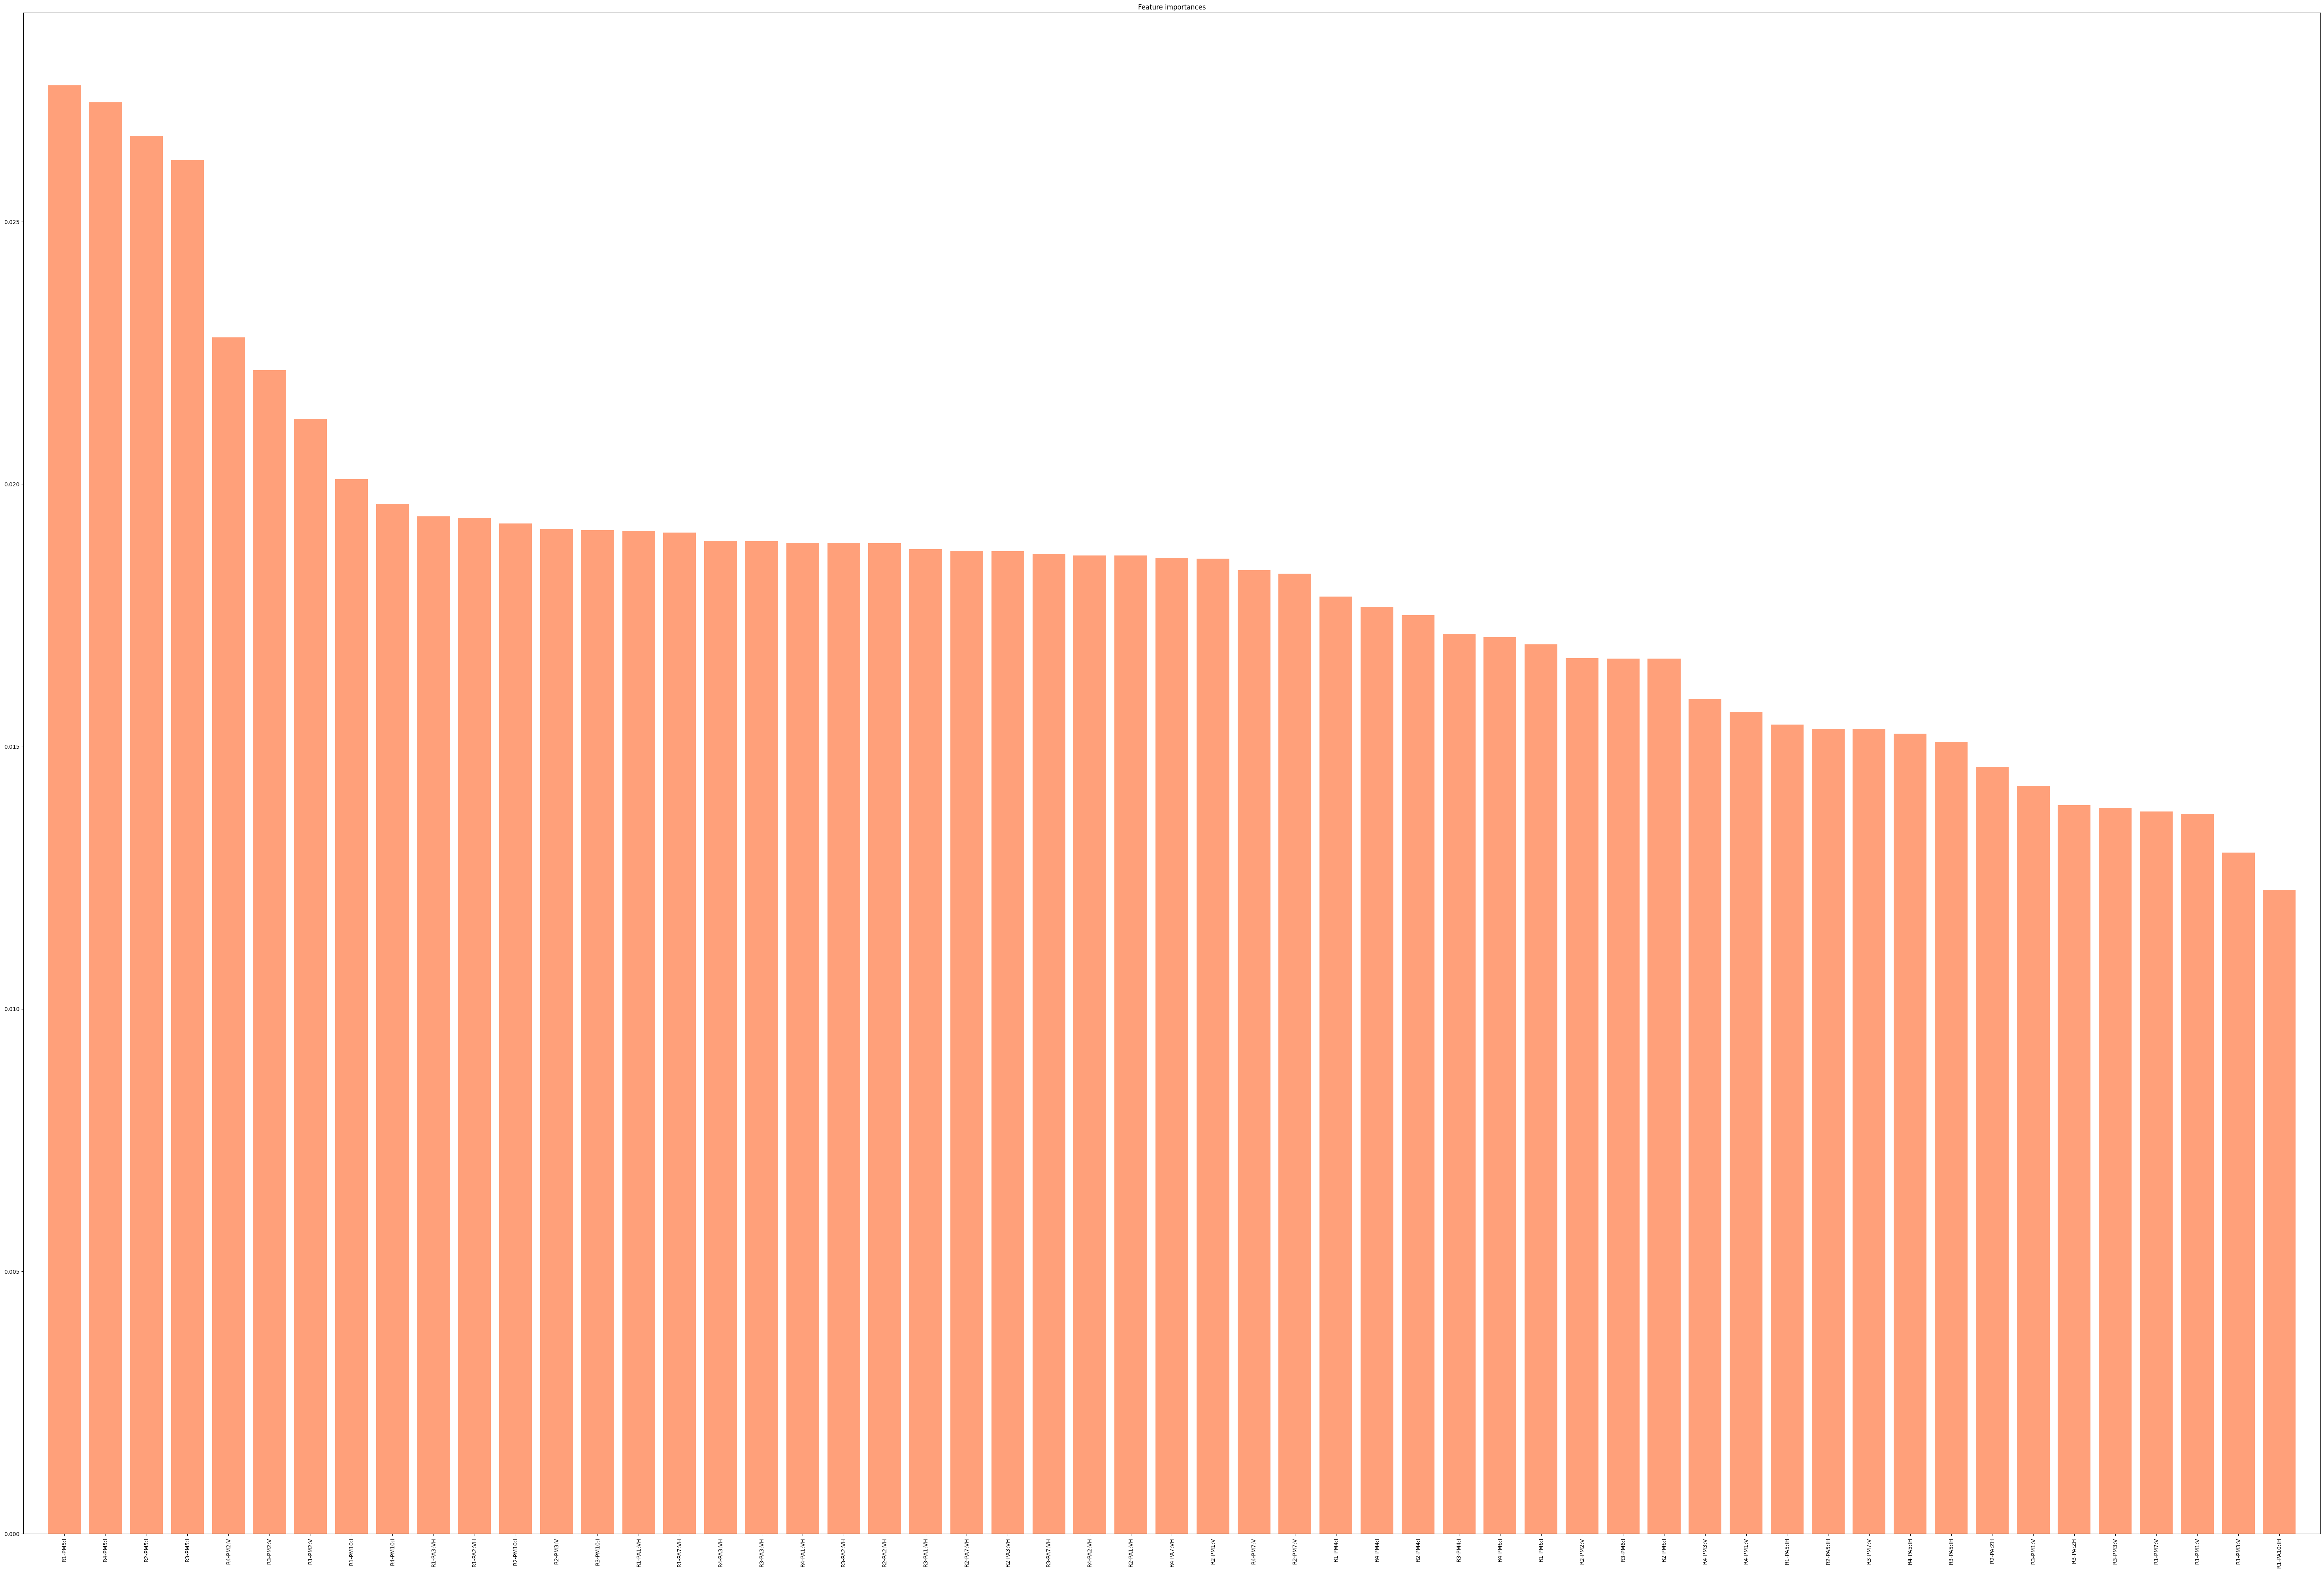

In [12]:
et = ExtraTreesClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
et.fit(feature_vector_1, data['marker'].tolist())
importances = et.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(75,50))
plt.title("Feature importances")
plt.bar(range(feature_vector_1.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(feature_vector_1.shape[1]), feature_vector_1.columns[indices], rotation=90)
plt.xlim([-1, feature_vector_1.shape[1]])
plt.show()

In [13]:
numerical_cols = feature_vector_1.select_dtypes(include=['float64', 'int64']).columns


scaler = RobustScaler()

# Normalize the numerical columns
feature_vector_1[numerical_cols] = scaler.fit_transform(feature_vector_1[numerical_cols])
feature_vector_1
# # Display the normalized DataFrame
# print(data)


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PM6:I,...,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PM10:I
0,0.553942,-1.111111,-0.307364,-0.847826,-1.220507,-1.133333,0.680825,-0.316417,0.848335,0.669915,...,-1.380526,-1.221582,-1.330498,0.687124,-0.314527,0.857429,0.667933,0.554220,-1.343012,0.729175
1,0.592635,-0.266667,-0.275842,-0.021739,-1.178308,-0.266667,-0.759709,-0.252698,-0.675709,-0.771011,...,-0.651915,-1.179441,-0.501663,-0.773709,-0.250165,-0.676788,-0.778032,0.593023,-0.545599,-0.749467
2,0.615654,0.600000,-0.257106,0.826087,-1.153322,0.577778,-0.690534,-0.234041,-0.684340,-0.691839,...,0.095870,-1.154378,0.348983,-0.700239,-0.231428,-0.682974,-0.699739,0.616032,0.272799,-0.699114
3,0.614600,0.511111,-0.257881,0.739130,-1.154396,0.488889,-0.671117,-0.235318,-0.681874,-0.671133,...,0.019174,-1.155450,0.239926,-0.684321,-0.232908,-0.678025,-0.677720,0.615045,0.188861,-0.685605
4,0.614192,0.488889,-0.258323,0.717391,-1.154914,0.488889,-0.663835,-0.235898,-0.680641,-0.662607,...,0.000000,-1.156005,0.239926,-0.678198,-0.233923,-0.676788,-0.665486,0.614569,0.167877,-0.678236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,-0.539016,-0.333333,0.541998,-0.086956,-0.084583,-0.355556,-0.271845,0.608519,-0.262639,-0.227771,...,-0.153392,-0.085990,0.043623,-0.188397,0.594422,-0.171981,-0.140682,-0.538828,-0.020985,-0.172256
78373,-0.539288,-0.311111,0.541804,-0.043478,-0.084842,-0.333333,-0.269417,0.607707,-0.258940,-0.222899,...,-0.191740,-0.086434,0.000000,-0.193295,0.594480,-0.175693,-0.146798,-0.539237,-0.062954,-0.177168
78374,-0.539424,-0.266667,0.541666,-0.021739,-0.084990,-0.288889,-0.258495,0.606749,-0.254007,-0.216809,...,-0.210914,-0.086693,0.000000,-0.194519,0.594828,-0.178167,-0.148022,-0.539441,-0.062954,-0.178397
78375,-0.539798,-0.177778,0.541389,0.065217,-0.085397,-0.222222,-0.240291,0.603499,-0.241677,-0.207065,...,-0.249262,-0.087321,-0.043623,-0.199417,0.595495,-0.184353,-0.150468,-0.540054,-0.104923,-0.183309


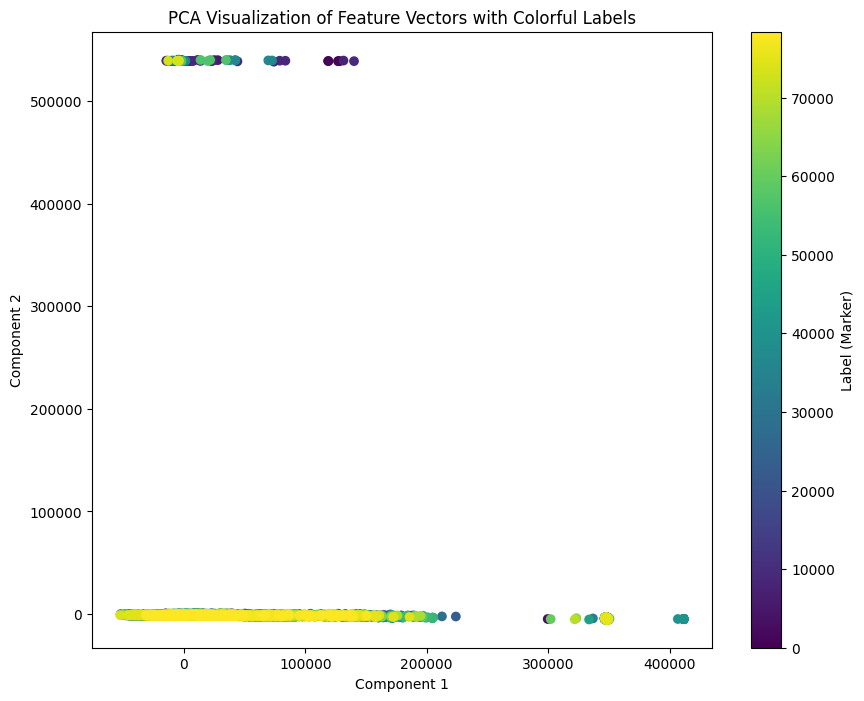

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' contains your DataFrame with features and labels
features1 = data.drop('marker', axis=1)  # Features
labels = data['marker']  # Labels

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
reduced_df = pd.DataFrame(components, columns=['Component 1', 'Component 2'])

# Plot PCA visualization with colored points based on labels
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['Component 1'], reduced_df['Component 2'], c=range(0,78377), cmap='viridis')
plt.title('PCA Visualization of Feature Vectors with Colorful Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Label (Marker)')
plt.show()


Explained Variance Ratio: [0.50922156 0.30467767 0.10109657]


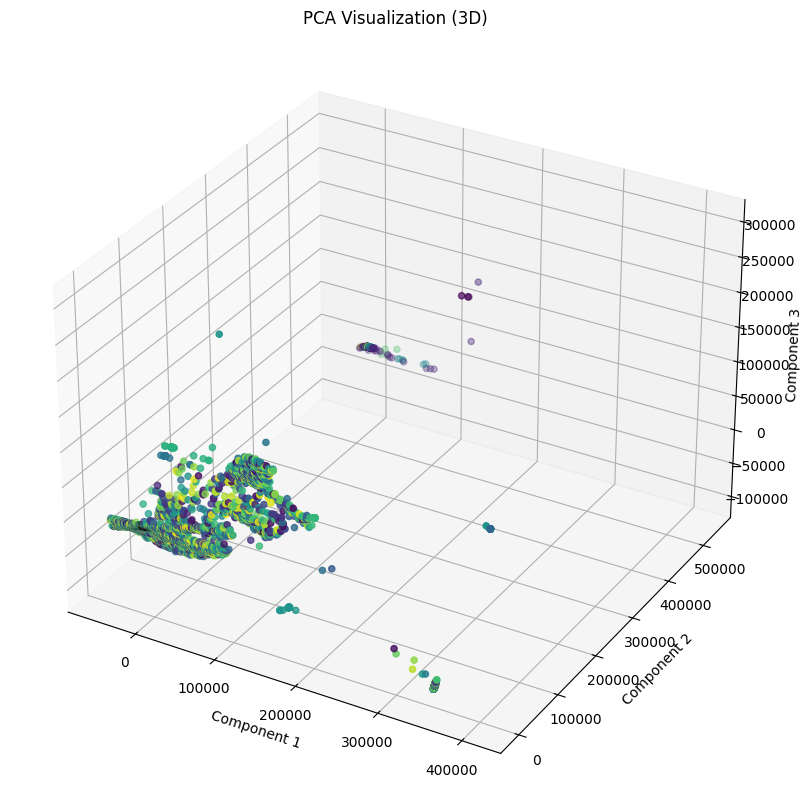

In [15]:
# Assuming 'df' contains your data
features1 = data.drop('marker', axis=1)  # Features
label = data['marker']  # Labels

from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # Reduce to 2 dimensions for visualization
components = pca.fit_transform(features1)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

# Plotting 3D PCA visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=range(0,78377), cmap='viridis')
ax.set_title('PCA Visualization (3D)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()


In [16]:
from sklearn.preprocessing import LabelEncoder

# Assuming the target variable is in a column named 'target'
# X = data.drop('marker', axis=1)
X = feature_vector_1
y = data['marker']
# y.value_counts()
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded

array([31, 31, 31, ...,  0,  0,  0])

In [17]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [18]:

# # Initialize TPOT Classifier
# tpot = TPOTClassifier(generations=5, population_size=20, cv=5,
#                                     random_state=42, verbosity=2)
# # tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)


In [19]:

# # Search for the best pipeline
# tpot.fit(X_train, y_train)


In [21]:
import joblib
# # Save the trained TPOT model to a file
# model_file = '/home/danish/Codes/AutoML/TPOT/Model_Trained_Dataset_1/tpot_trained_model.joblib'
# joblib.dump(tpot.fitted_pipeline_, model_file)
# print(f"Trained TPOT model saved to {model_file}")


# Load the saved TPOT model from file
model_file = '/home/danish/Codes/AutoML/TPOT/Model_Trained_Dataset_3/tpot_trained_model.joblib'
tpot = joblib.load(model_file)
print(f"Trained TPOT model loaded from {model_file}")

# Now you can use the loaded model for prediction tasks
# Example: Make predictions using the loaded model
# Assuming 'X_test' is your test data
y_pred = tpot.predict(X_test)

Trained TPOT model loaded from /home/danish/Codes/AutoML/TPOT/Model_Trained_Dataset_3/tpot_trained_model.joblib


In [22]:

# Evaluate the best pipeline on the test set
accuracy = tpot.score(X_test, y_test)
print(f"Test accuracy: {accuracy}")

# Make predictions
y_pred = tpot.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

Test accuracy: 0.8453687165093136


array([[240,   0,   0, ...,   5,   6,   0],
       [  0, 291,  10, ...,   0,   0,   0],
       [  0,   4, 315, ...,   0,   0,   0],
       ...,
       [  8,   0,   1, ..., 216,  10,   4],
       [  2,   0,   1, ...,  14, 171,   8],
       [  7,   0,   0, ...,   8,   6, 164]])

In [23]:
from pycm import ConfusionMatrix

# Calculate and print PyCM metrics
pycm_obj = ConfusionMatrix(actual_vector=list(y_test), predict_vector=list(y_pred))
print(pycm_obj)

# Get detailed PyCM report
pycm_report = pycm_obj.overall_stat
print(pycm_report)

Predict   0         1         2         3         4         5         6         7         8         9         10        11        12        13        14        15        16        17        18        19        20        21        22        23        24        25        26        27        28        29        30        31        32        33        34        35        36        
Actual
0         240       0         0         0         10        0         1         5         0         0         7         9         0         2         4         1         0         0         1         1         1         1         7         0         1         2         6         3         2         0         0         2         0         1         5         6         0         

1         0         291       10        6         0         9         0         0         1         0         0         0         4         0         0         0         0         2         1         0         0         5         

/home/danish/anaconda3/envs/AutoML/lib/python3.9/site-packages/pycm/pycm_obj.py:217: RuntimeWarning: The confusion matrix is a high dimension matrix and won't be demonstrated properly.
If confusion matrix has too many zeros (sparse matrix) you can set `sparse` flag to True in printing functions otherwise by using save_csv method to save the confusion matrix in csv format you'll have better demonstration.
  warn(CLASS_NUMBER_WARNING, RuntimeWarning)
